In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Dataset\Titanic\test.csv')

In [3]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.drop('Cabin',axis=1,inplace=True)

In [5]:
df.drop('Name',axis=1,inplace=True)

In [6]:
df.drop('Ticket',axis=1,inplace=True)

In [7]:
df.drop('Parch',axis=1,inplace=True)

In [8]:
df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Fare            1
Embarked        0
dtype: int64

In [9]:
cat=df.select_dtypes(include=[object]).columns
num=df.select_dtypes(exclude=[object]).columns
print('CAT:',cat)
print('Num:',num)

CAT: Index(['Sex', 'Embarked'], dtype='object')
Num: Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')


In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].median())

In [11]:
for i in cat:
    a=df[i].unique()
    print(i,a)

Sex ['male' 'female']
Embarked ['Q' 'S' 'C']


In [12]:
for i in cat:
    a=df[i].nunique()
    print(i,a)

Sex 2
Embarked 3


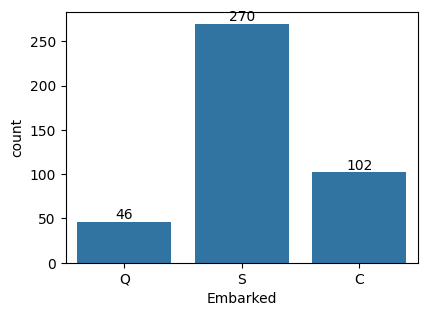

In [13]:
plt.figure(figsize=(10,15))
for i,column in enumerate(cat[1:]):
    plt.subplot(4,2,i+1)

    ax=sns.countplot(data=df,x=column)
    ax.bar_label(ax.containers[0])
plt.show()

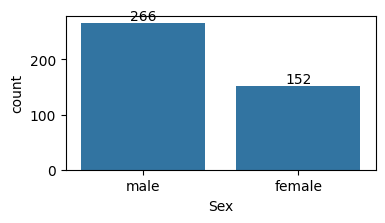

In [14]:
plt.figure(figsize=(4,2))
ax=sns.countplot(x=df['Sex'])
ax.bar_label(ax.containers[0])
plt.show()

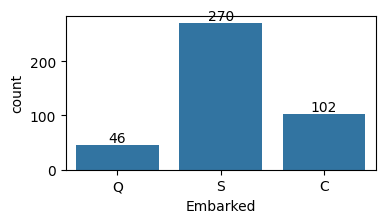

In [15]:
plt.figure(figsize=(4,2))
ax=sns.countplot(x=df['Embarked'])
ax.bar_label(ax.containers[0])
plt.show()

In [16]:
for i in num:
    d_count=round(df[i].count(),2)
    d_max=round(df[i].max(),2)
    d_min=round(df[i].min(),2)
    d_mean=round(df[i].mean(),2)
    d_median=round(df[i].median(),2)
    d_std=round(df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

PassengerId count: 418
PassengerId max: 1309
PassengerId min: 892
PassengerId mean: 1100.5
PassengerId median: 1100.5
PassengerId std: 120.81
------------------------------------
Pclass count: 418
Pclass max: 3
Pclass min: 1
Pclass mean: 2.27
Pclass median: 3.0
Pclass std: 0.84
------------------------------------
Age count: 418
Age max: 76.0
Age min: 0.17
Age mean: 30.27
Age median: 30.27
Age std: 12.63
------------------------------------
SibSp count: 418
SibSp max: 8
SibSp min: 0
SibSp mean: 0.45
SibSp median: 0.0
SibSp std: 0.9
------------------------------------
Fare count: 418
Fare max: 512.33
Fare min: 0.0
Fare mean: 35.58
Fare median: 14.45
Fare std: 55.85
------------------------------------


In [17]:
for i in num:
    q1=np.quantile(df[i],0.25)
    q2=np.quantile(df[i],0.50)
    q3=np.quantile(df[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

PassengerId q1: 996.25
PassengerId q2: 1100.5
PassengerId q3: 3
------------
Pclass q1: 1.0
Pclass q2: 3.0
Pclass q3: 3
------------
Age q1: 23.0
Age q2: 30.272590361445783
Age q3: 3
------------
SibSp q1: 0.0
SibSp q2: 0.0
SibSp q3: 3
------------
Fare q1: 7.8958
Fare q2: 14.4542
Fare q3: 3
------------


In [18]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,35.576535
std,120.810458,0.841838,12.634534,0.896760,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,512.329200


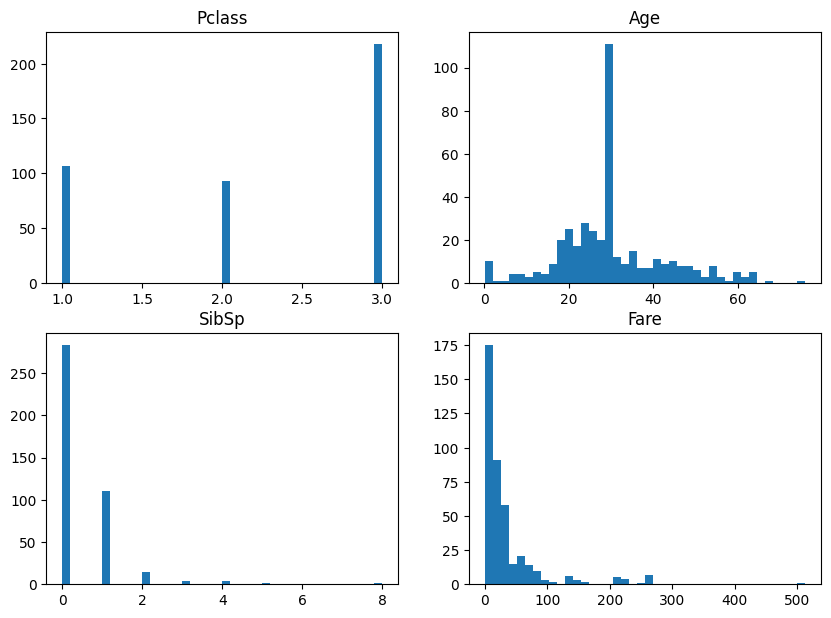

In [19]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num[1:]):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(df[column],bins=40)
plt.show()

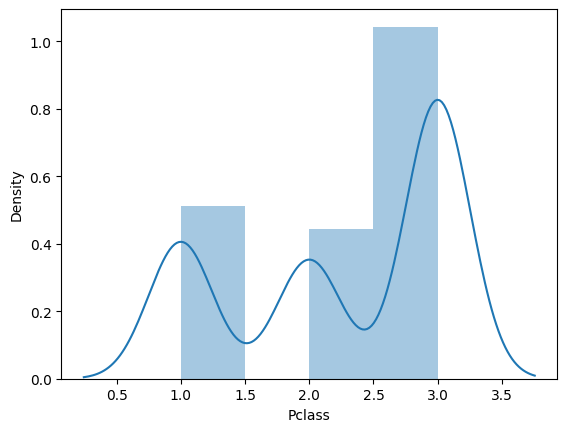

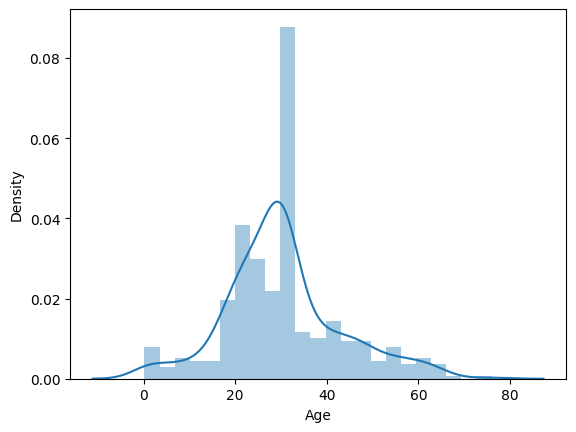

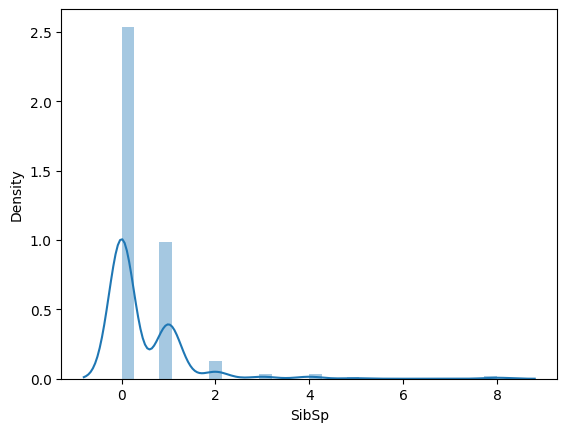

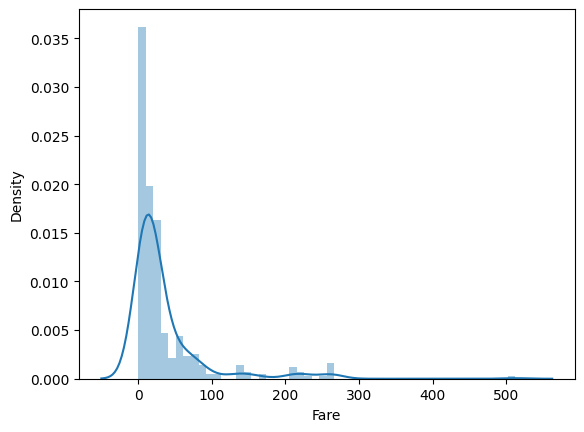

In [20]:
for i in num[1:]:
    #plt.subplot(3,2,i+1)
    sns.distplot(df[i])
   # plt.subplot(3,2,i+1)
    plt.show()

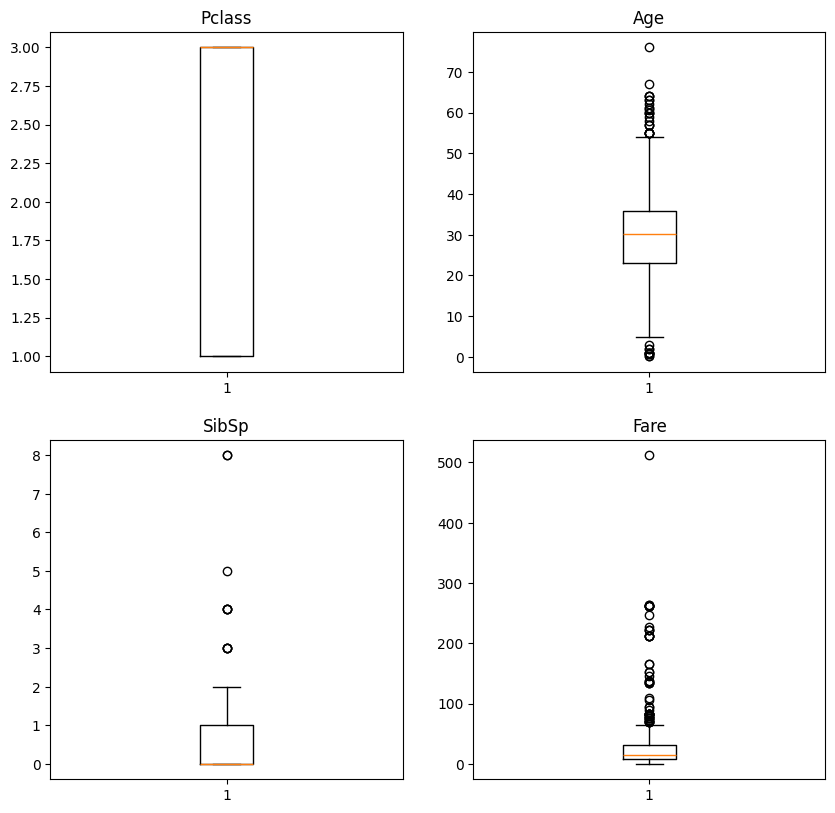

In [21]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num[1:]):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

In [22]:
q1=np.quantile(df['Age'],0.25)
q2=np.quantile(df['Age'],0.50)
q3=np.quantile(df['Age'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=df['Age']>ub1
con2=df['Age']<lb1
outlier=df[con1|con2]
len(outlier)

36

In [23]:
 v=(len(outlier)/len(df))*100
 v

8.61244019138756

In [24]:
df["Age"]=np.clip(df['Age'],lb1,ub1)

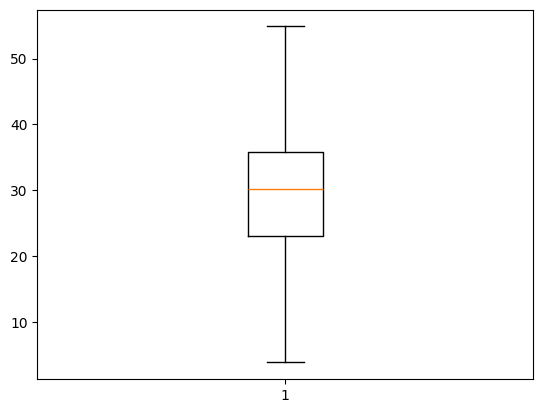

In [25]:
plt.boxplot(df['Age'])
plt.show()

In [26]:
q1=np.quantile(df['Fare'],0.25)
q2=np.quantile(df['Fare'],0.50)
q3=np.quantile(df['Fare'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=df['Fare']>ub2
con2=df['Fare']<lb2
outlier=df[con1|con2]
len(outlier)

55

In [27]:
df["Fare"]=np.clip(df['Fare'],lb1,ub1)

In [28]:
# plt.boxplot(df['Fare'])
# plt.show()

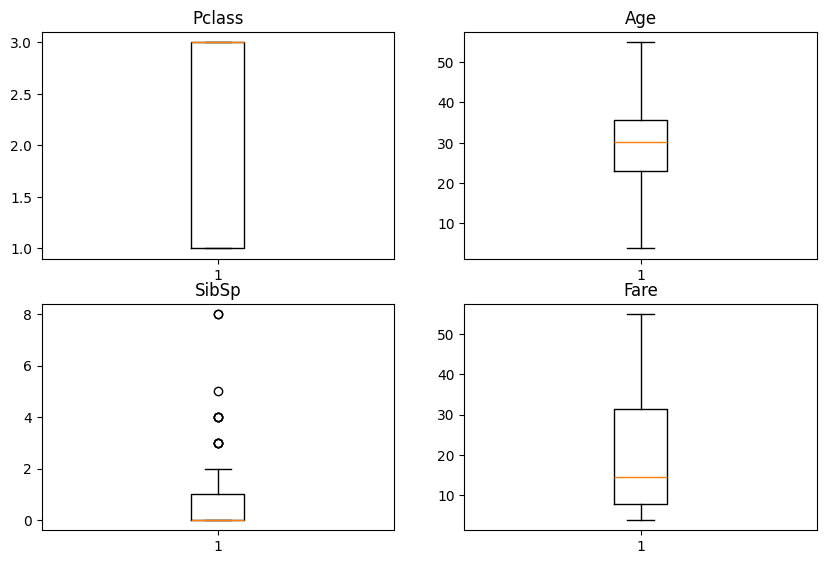

In [29]:
plt.figure(figsize=(10,10))
for i,column in enumerate(num[1:]):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.show()

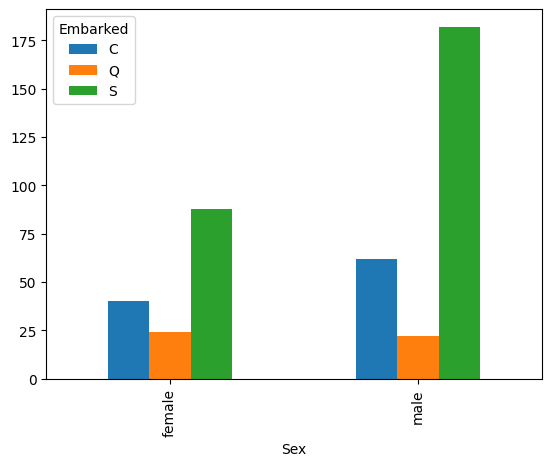

In [31]:
col1=df['Sex']
col2=df['Embarked']

result=pd.crosstab(col1,col2)
#result
result.plot(kind='bar')
plt.show()

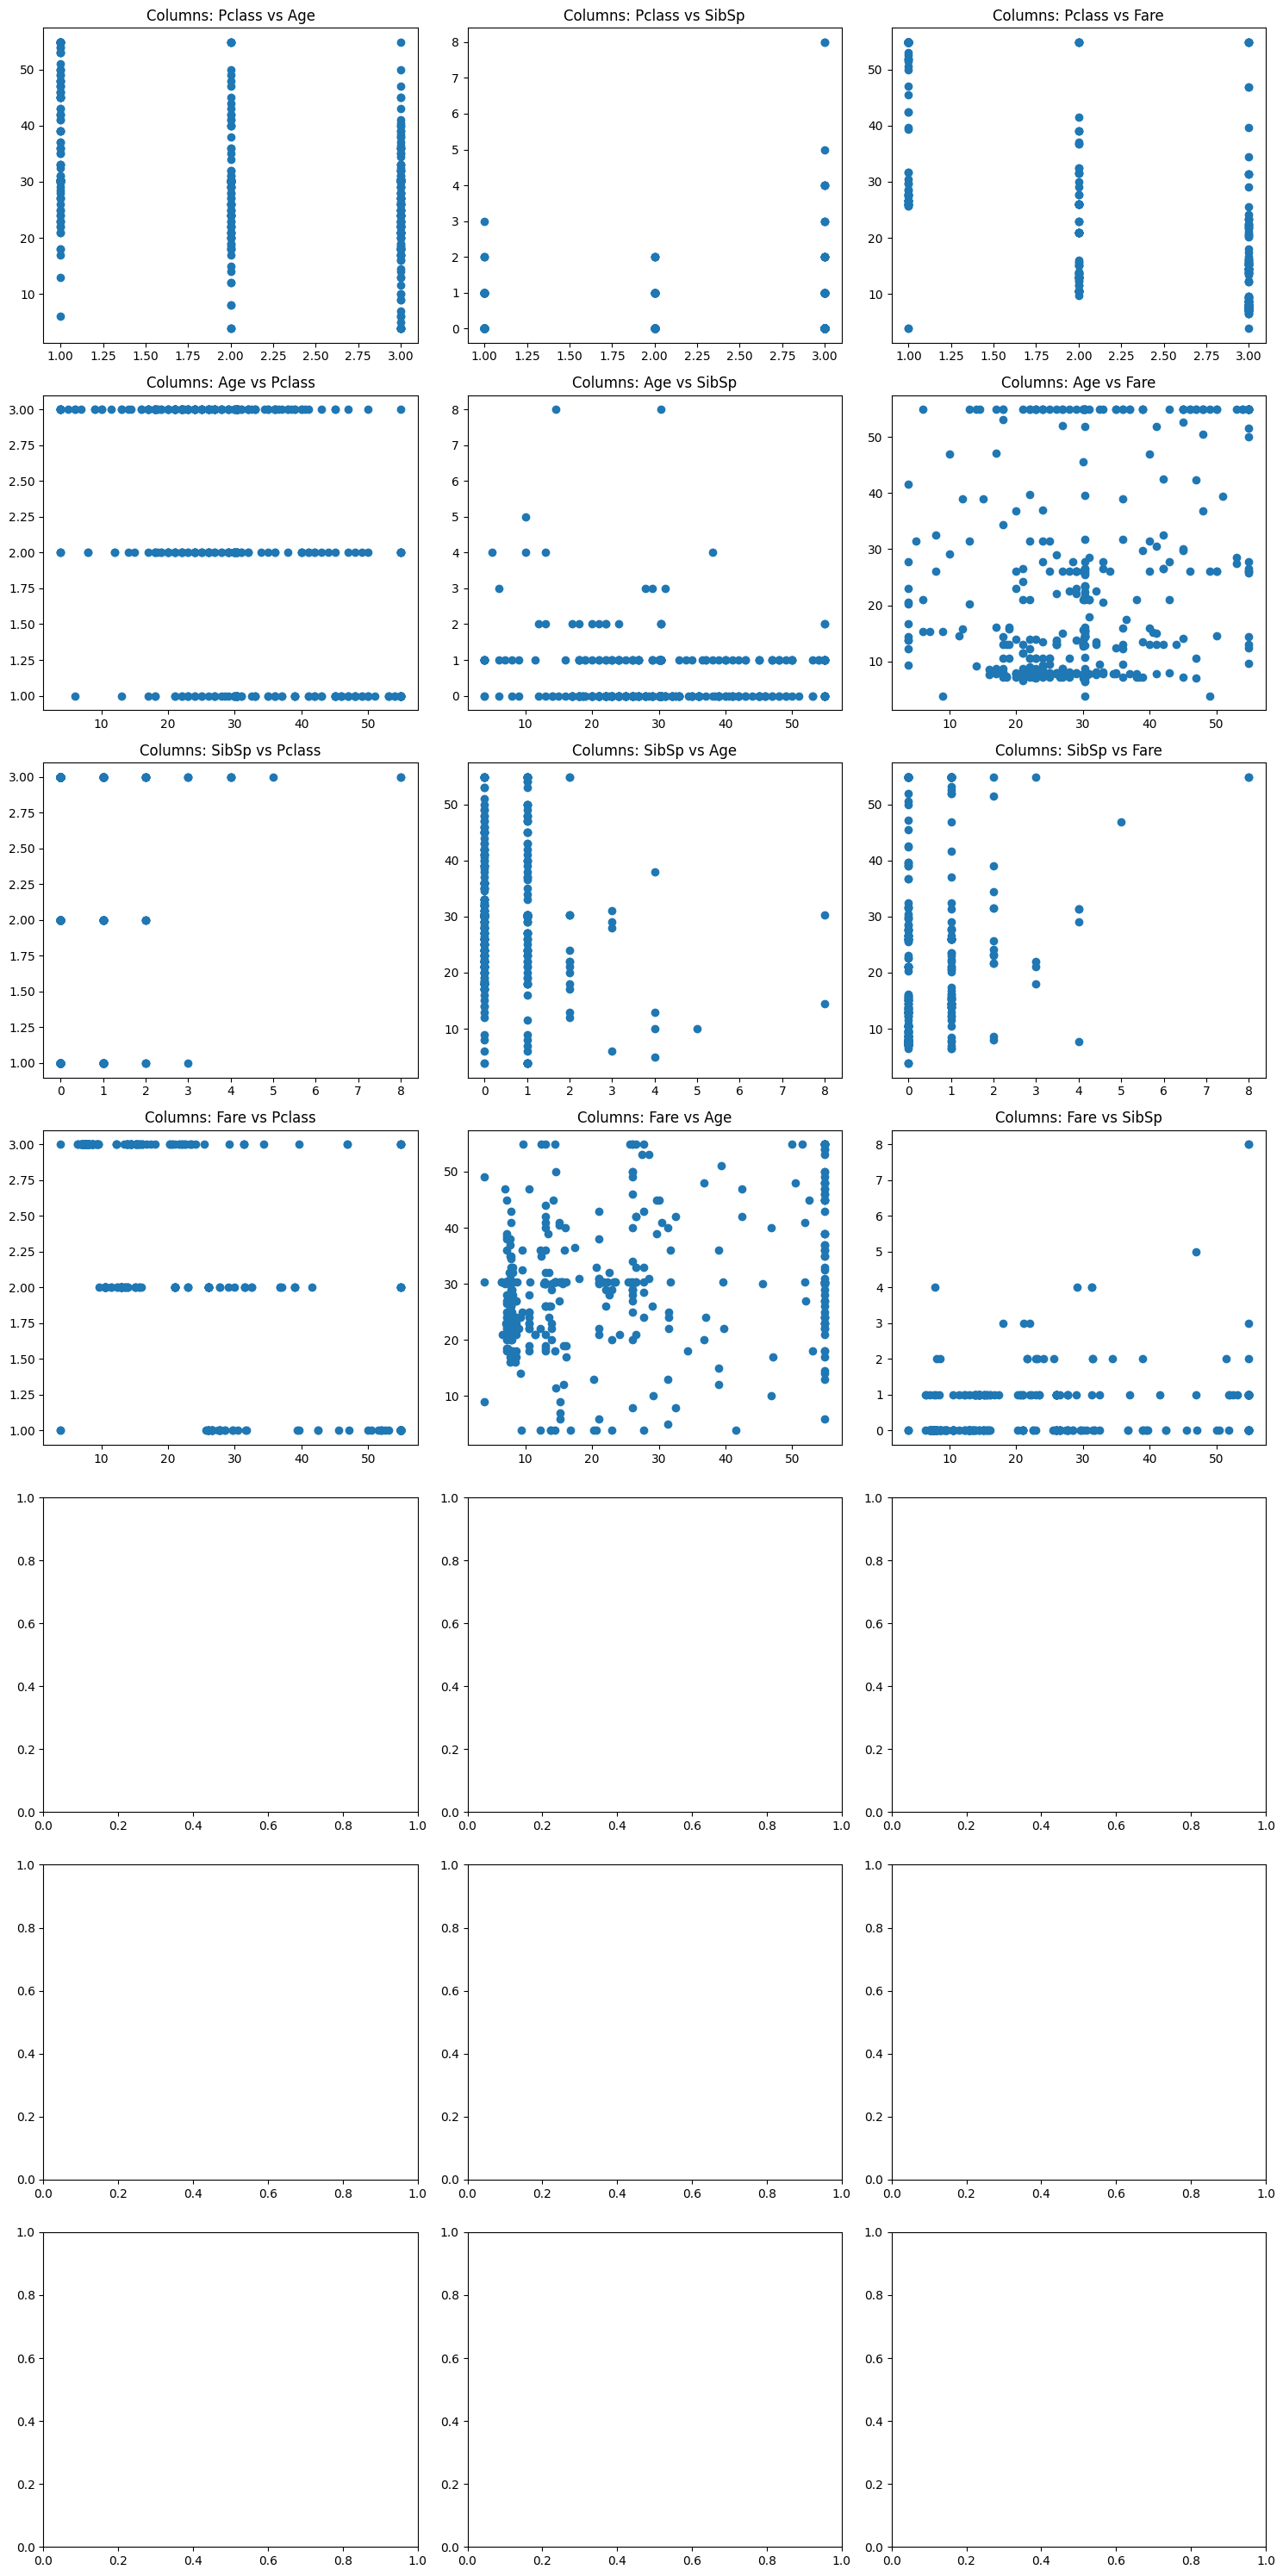

In [32]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 7* 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num[1:]:
    for j in num[1:]:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 3, plot_counter % 3]  # Get the current subplot
            ax.scatter(df[i], df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [33]:
corr=df.corr(numeric_only=True)
corr

,PassengerId,Pclass,Age,SibSp,Fare
PassengerId,1.000000,-0.026751,-0.018131,0.003818,0.041791
Pclass,-0.026751,1.000000,-0.441413,0.001087,-0.766725
Age,-0.018131,-0.441413,1.000000,-0.092328,0.320089
SibSp,0.003818,0.001087,-0.092328,1.000000,0.314319
Fare,0.041791,-0.766725,0.320089,0.314319,1.000000


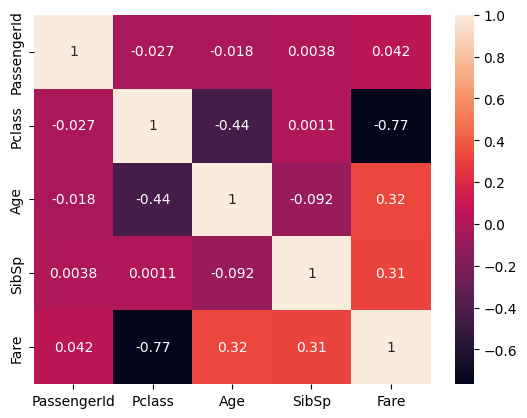

In [34]:
sns.heatmap(corr,annot=True)
plt.show()

In [35]:
for i in (num):
    print(i,df[i].skew())

PassengerId 0.0
Pclass -0.5341703482345055
Age 0.2891048514789935
SibSp 4.168336568562722
Fare 0.8976631506264917


In [36]:
df['SibSp'] = np.log1p(df['SibSp'])

In [37]:
df['SibSp']=np.sqrt(df['SibSp'])

In [38]:
df['SibSp'].skew()

0.8922146262951693

In [39]:
for i in (num):
    print(i,df[i].skew())

PassengerId 0.0
Pclass -0.5341703482345055
Age 0.2891048514789935
SibSp 0.8922146262951693
Fare 0.8976631506264917


In [40]:
for i in cat:
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [41]:
df

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,3,1,34.50000,0.000000,7.8292,1
1,893,3,0,47.00000,0.832555,7.0000,2
2,894,2,1,54.87500,0.000000,9.6875,1
3,895,3,1,27.00000,0.000000,8.6625,2
4,896,3,0,22.00000,0.832555,12.2875,2
...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0.000000,8.0500,2
414,1306,1,0,39.00000,0.000000,54.8750,0
415,1307,3,1,38.50000,0.000000,7.2500,2
416,1308,3,1,30.27259,0.000000,8.0500,2


In [60]:
import pickle
RFree = pickle.load(open("best_model",'rb'))

In [61]:
y_pred = RFree.predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
pred_df = pd.DataFrame(y_pred,columns=['Survived'])
pred_df

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [63]:
a=df['PassengerId']
a

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [64]:
b = pd.concat([a,pred_df],axis = 1)
b

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
b = b.set_index('PassengerId')
b

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [67]:
b.to_csv("prediction_new2.csv")